<a href="https://colab.research.google.com/github/mlerouxp/finalproject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
This notebook provides some skeleton code to get you started on the homework. Add in your own code and markdown cells to answer the homework questions. If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.
This notebook can be opened in Colab Open:
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/HW8.ipynb)


Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab. This will save the notebook in your Google Drive.





# Clones, installs, imports, and **GPU**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
!git clone https://github.com/mlerouxp/finalproject

import os
os.chdir("finalproject")

Cloning into 'finalproject'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
Checking out files: 100% (29/29), done.


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 58 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 10.7 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 1.6 MB 40.8 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.8 MB 43.3 MB/s 
     |████████████████████████████████| 77 kB 6.6 MB/s 
     |████████████████████████████████| 596 kB 51.0 MB/s 
     |████████████████████████████████| 880 kB 41.7 MB/s 
     |████████████████████████████████| 6.6 MB 36.8 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
     |████████████████████████████████| 162 kB 58.5 MB/s 
     |████████████████████████████████| 181 kB 53.2 MB/s 
     |████████████████████████████████| 144 kB 56.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created whee

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import umap
import scripts.TextAnalysis as ta
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import codecs  #this let's us display tweets properly (emojis, etc.)
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt

import umap
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import sklearn.cluster as cluster
from sklearn import metrics
from scipy import stats

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## Task 1: Find User Communities to give an idea of the types of communities they can build

Find User Communities by Clustering Tweets and Run Sentiment Analysis (Lecture 4/Homework 2 Problem 2) [data: Tweets]

In [ ]:
fname_db = pd.read_csv("data/mental_health_tweets.csv")
fname_db

,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
0,0,2022-04-14T21:19:51.000Z,MHAS_LA,"RT @LACBAveterans: #Veterans in #CA, there are still spots open for our April 20th Record Clearing Clinic! Do you have an old conviction th…",en,1,0,0,0,1514715080394375194,135385762,1514715080394375194,NaN,None
1,1,2022-04-14T21:17:56.000Z,MHAS_LA,"RT @FairHsngNorCal: FHANC’s Virtual Fair Housing Conference, ‘Investing in Our Future: Fair Housing and Race-Conscious Policies' is on Apri…",en,1,0,0,0,1514714594551365641,135385762,1514714594551365641,NaN,None
2,2,2022-04-13T15:23:22.000Z,MHAS_LA,We'll be there (virtually)! Join us at the #HousingRightsSummit on April 21.\n#FairHousingMonth #KnowYourRights https://t.co/nZaKFtEvSF,en,1,0,2,0,1514262978454904838,135385762,1514262978454904838,NaN,None
3,3,2022-04-13T14:40:34.000Z,MHAS_LA,"RT @DisabilityCA: Reporting mental health disability discrimination is one of the best ways to fight it!\n\nIn this webinar, you’ll learn how…",en,6,0,0,0,1514252207780085761,135385762,1514252207780085761,NaN,None
4,4,2022-04-11T18:58:23.000Z,MHAS_LA,April 14 at 1:00pm PT: DFEH webinar re: Emotional Support Animals and Fair Housing Law \n#FairHousingMonth https://t.co/JB42shbEa3,en,0,0,0,0,1513592314974785537,135385762,1513592314974785537,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194332,194332,2016-12-04T22:29:39.000Z,thisiscalmer,RT @RobinSharma: How high you fly is derived from how big you think.,en,80,0,0,0,805539593395257348,800363191419080704,805539593395257348,NaN,None
194333,194333,2016-12-03T14:15:34.000Z,thisiscalmer,"RT @simoncox73: RT IF YOU AGREE Support Small Businesses, not only today, but as much as possible! #SmallBusinessSaturday #SmallBizSatUK ht…",en,56,0,0,0,805052862912954368,800363191419080704,805052862912954368,NaN,None
194334,194334,2016-12-03T11:13:05.000Z,thisiscalmer,Thanks to everyone who has registered interest in Calmer! Join our #community &amp; receive a FREE COPY of our toolkit: https://t.co/7imAqd4K61 https://t.co/dLXSWmiJQI,en,1,0,1,0,805006942083096576,800363191419080704,805006942083096576,NaN,None
194335,194335,2016-12-02T09:44:29.000Z,thisiscalmer,"""Dream big. Start small. Act now."" - @RobinSharma\n\nWhat first step could you take today to get you closer to your #dream?",en,0,0,0,0,804622255758213120,800363191419080704,804622255758213120,NaN,None


In [ ]:
#df = DB.fetch(table_name='user_tweets', path = fname_db)
df = fname_db[['screen_name','text']]
df['text_clean']=df.text.apply(ta.clean_tweet)
df=df[df.text_clean.str.len()>0]
#df_kim = df[df.screen_name=='KimKardashian'].copy()
nk=len(df)
print(f"There are {nk} tweets about mental health, after cleaning them")
df.head()

There are 191594 tweets about mental health, after cleaning them


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,screen_name,text,text_clean
0,MHAS_LA,"RT @LACBAveterans: #Veterans in #CA, there are still spots open for our April 20th Record Clearing Clinic! Do you have an old conviction th…",lacbaveterans veterans in ca there are still spots open for our april 20th record clearing clinic do you have an old conviction th
1,MHAS_LA,"RT @FairHsngNorCal: FHANC’s Virtual Fair Housing Conference, ‘Investing in Our Future: Fair Housing and Race-Conscious Policies' is on Apri…",fairhsngnorcal fhancs virtual fair housing conference investing in our future fair housing and raceconscious policies is on apri
2,MHAS_LA,We'll be there (virtually)! Join us at the #HousingRightsSummit on April 21.\n#FairHousingMonth #KnowYourRights https://t.co/nZaKFtEvSF,well be there virtually join us at the housingrightssummit on april 21fairhousingmonth knowyourrights
3,MHAS_LA,"RT @DisabilityCA: Reporting mental health disability discrimination is one of the best ways to fight it!\n\nIn this webinar, you’ll learn how…",disabilityca reporting mental health disability discrimination is one of the best ways to fight itin this webinar youll learn how
4,MHAS_LA,April 14 at 1:00pm PT: DFEH webinar re: Emotional Support Animals and Fair Housing Law \n#FairHousingMonth https://t.co/JB42shbEa3,april 14 at 100pm pt dfeh webinar re emotional support animals and fair housing law fairhousingmonth


In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
tfidf_embedding = tfidf_vectorizer.fit_transform(df.text_clean)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

nvocab = len(tfidf_feature_names)
print(f"{nvocab} words in vocabulary")

25308 words in vocabulary


In [ ]:
umap_tfidf_embedding = umap.UMAP(n_components=2, metric='hellinger').fit_transform(tfidf_embedding)
umap_tfidf_embedding = stats.zscore(umap_tfidf_embedding,nan_policy='omit')

df['umap_tfidf_x'] = umap_tfidf_embedding[:,0]
df['umap_tfidf_y'] = umap_tfidf_embedding[:,1]

In [ ]:
n_clusters = 5
kmeans_label = cluster.KMeans(n_clusters=n_clusters).fit_predict(np.nan_to_num(umap_tfidf_embedding))
df['kmeans_label_tfidf_umap'] = [str(x) for x in kmeans_label]

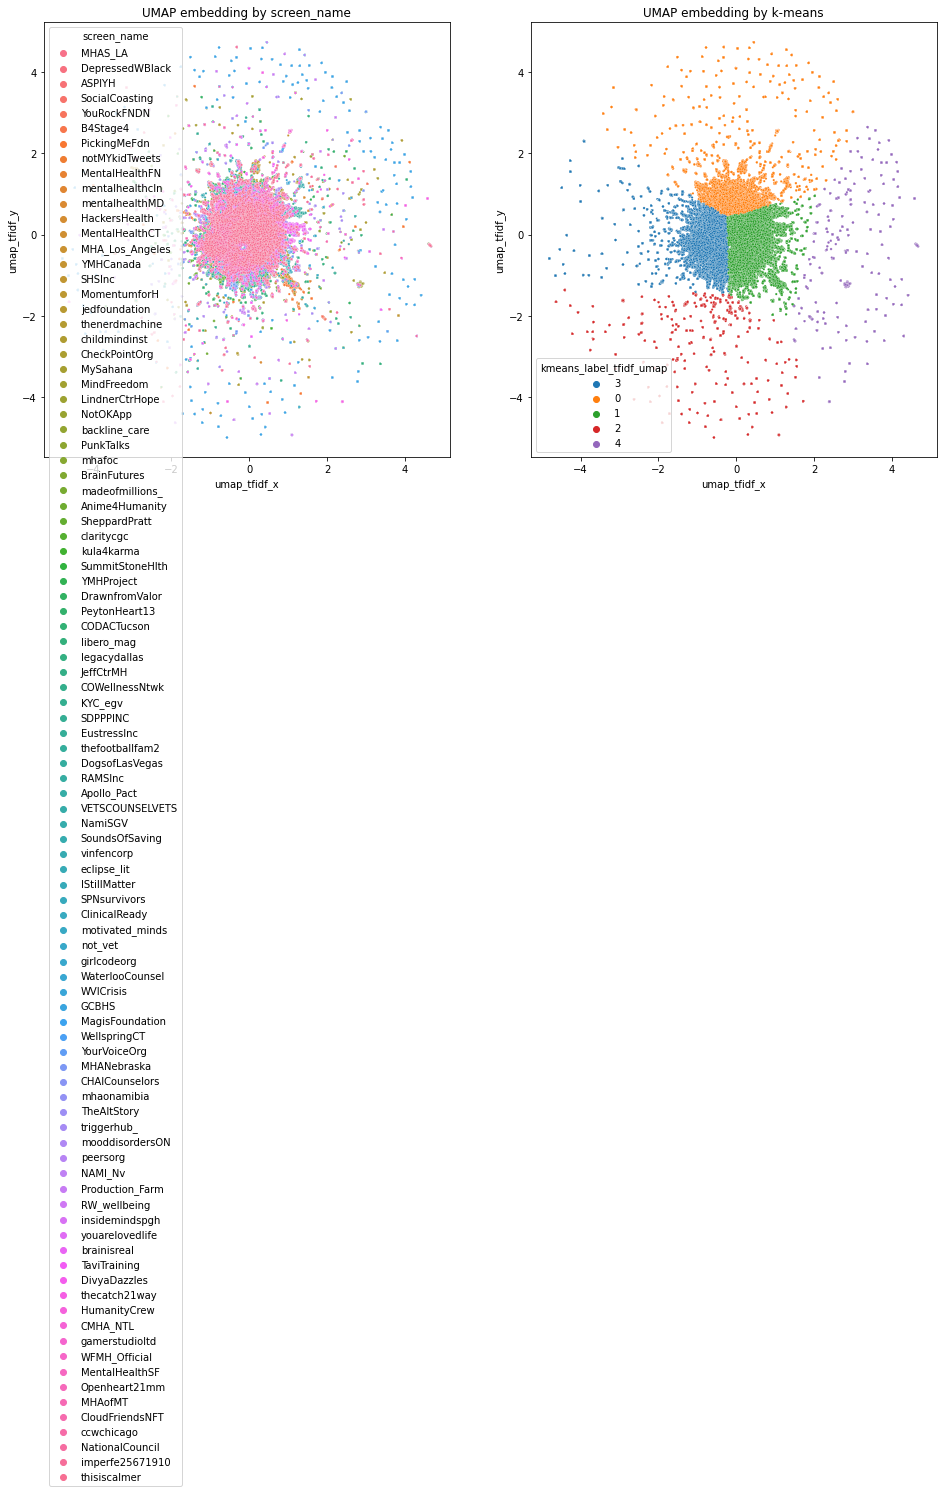

In [ ]:
#xmax = 3  #range for x-axis
#ymax = 3  #range for y-axis
s = 5  #marker size

fig = plt.figure(figsize = (16,8))

ax1 = plt.subplot(1,2,1)
sns.scatterplot(data=df, x="umap_tfidf_x", 
                y="umap_tfidf_y", hue="screen_name", s=s)
plt.title("UMAP embedding by screen_name")
#plt.xlim([-xmax, xmax])
#plt.ylim([-ymax,ymax])

ax2 = plt.subplot(1,2,2)
sns.scatterplot(data=df, x="umap_tfidf_x", 
                y="umap_tfidf_y", hue="kmeans_label_tfidf_umap", s=s)
plt.title("UMAP embedding by k-means");
#plt.xlim([-xmax, xmax])
#plt.ylim([-ymax,ymax])

plt.show()

In [ ]:
def kmeans_wordcloud_userhist(df, cluster_label_column,stopwords):
    print(cluster_label_column)
    for k in np.sort(df[cluster_label_column].unique()):
        s=df[df[cluster_label_column]==k]
        text=' '.join(s.text_clean.tolist()).lower()
        wordcloud = WordCloud(stopwords=stopwords,max_font_size=150, max_words=100, background_color="white",width=1000, height=600)
        wordcloud.generate(text)
     
        print(f"\n\tCluster {k} {cluster_label_column} has {len(s)} tweets")
        plt.figure(figsize = (35,4))
        plt.subplot(1,2,1)
        ax = sns.countplot(data = s, x = 'screen_name')
        plt.xticks(rotation=90)
        plt.ylabel("Number of tweets", fontsize=16)
        plt.xlabel("Screen name", fontsize=16)

        plt.subplot(1,2,2)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    return 1

kmeans_label_tfidf_umap

	Cluster 0 kmeans_label_tfidf_umap has 38495 tweets


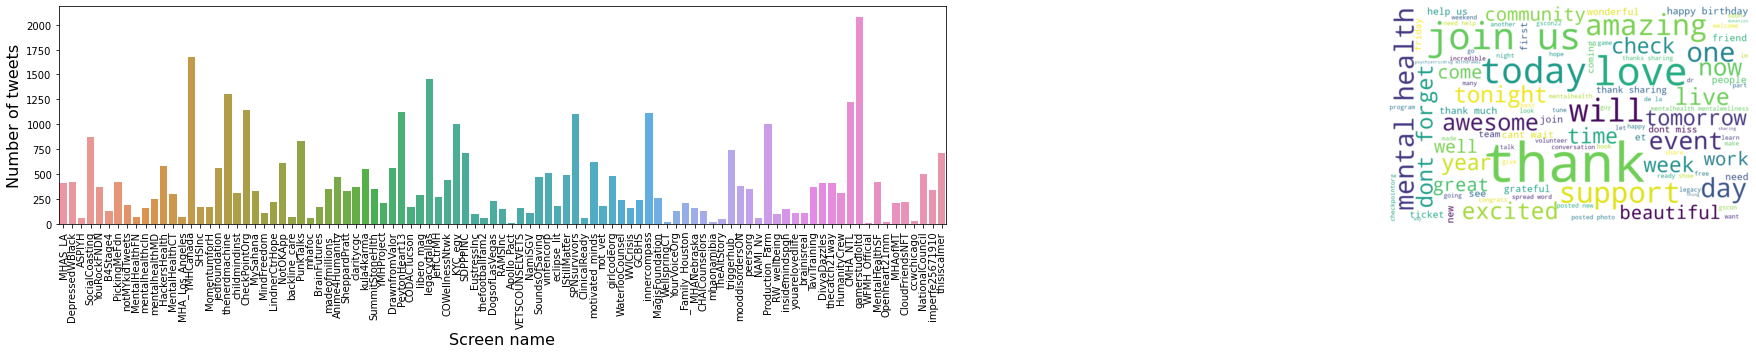


	Cluster 1 kmeans_label_tfidf_umap has 84710 tweets


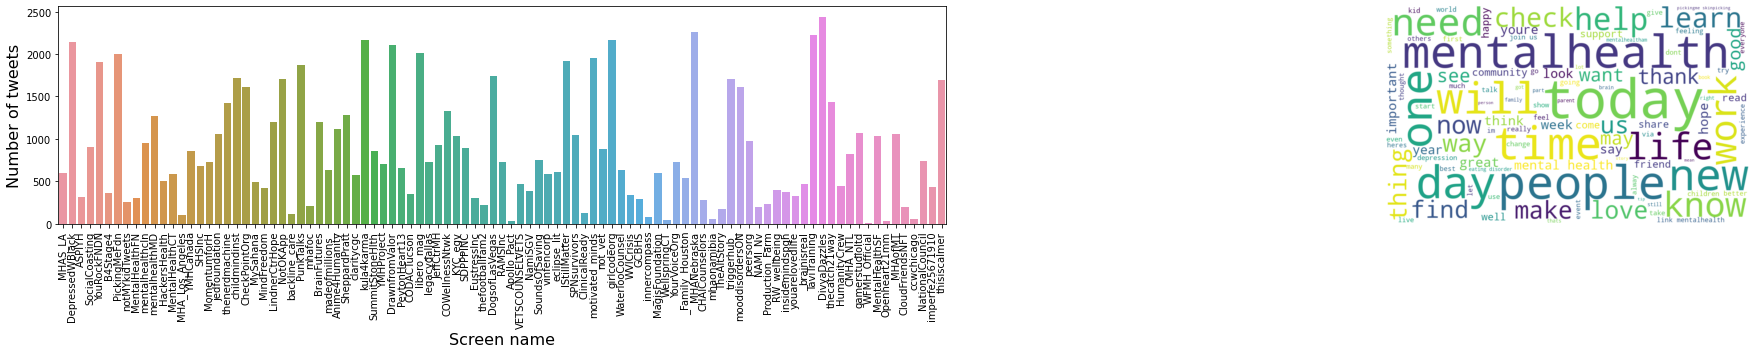


	Cluster 2 kmeans_label_tfidf_umap has 5656 tweets


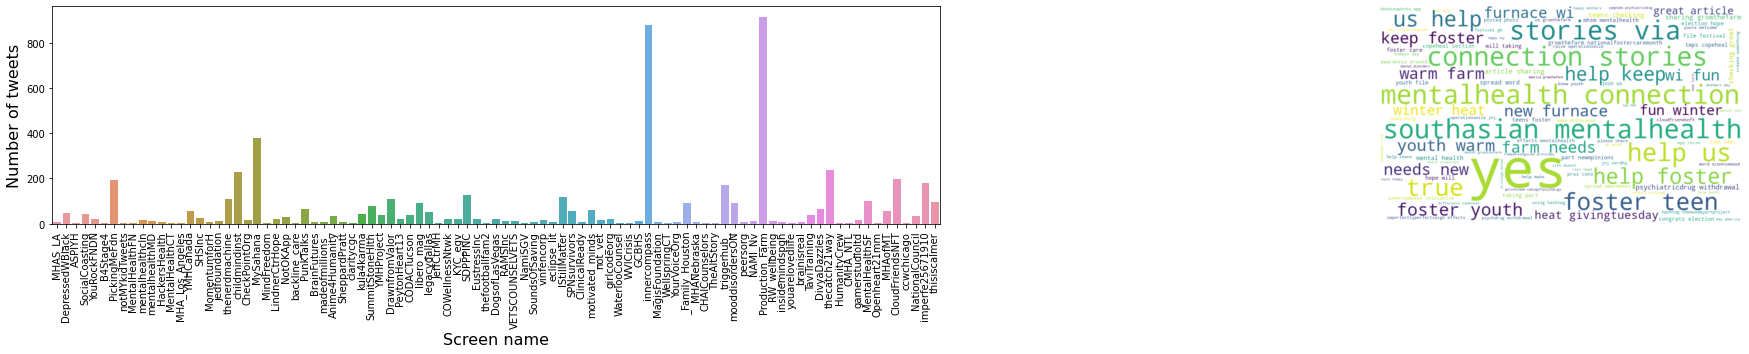


	Cluster 3 kmeans_label_tfidf_umap has 56465 tweets


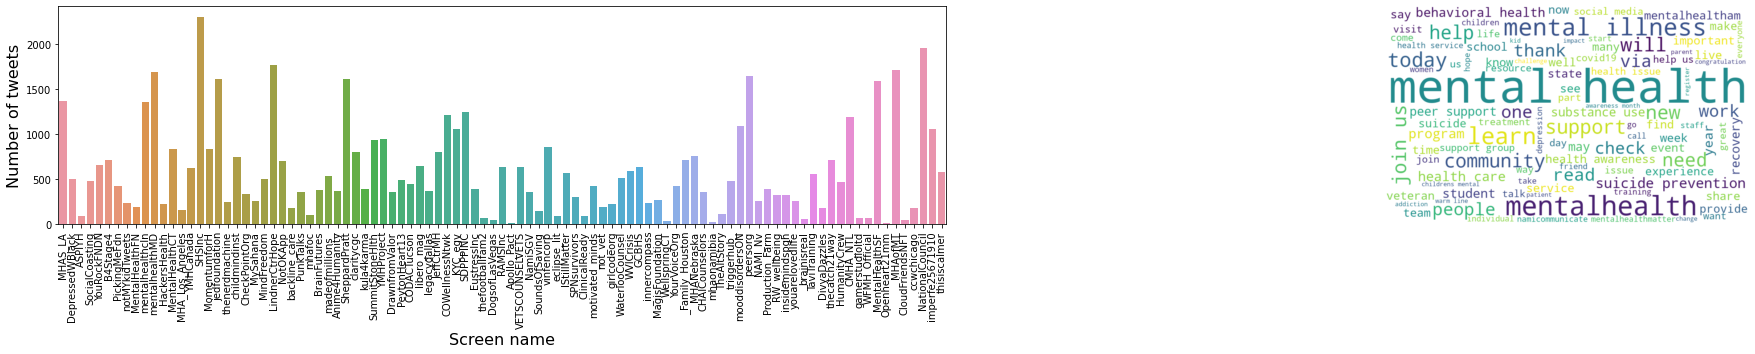


	Cluster 4 kmeans_label_tfidf_umap has 6268 tweets


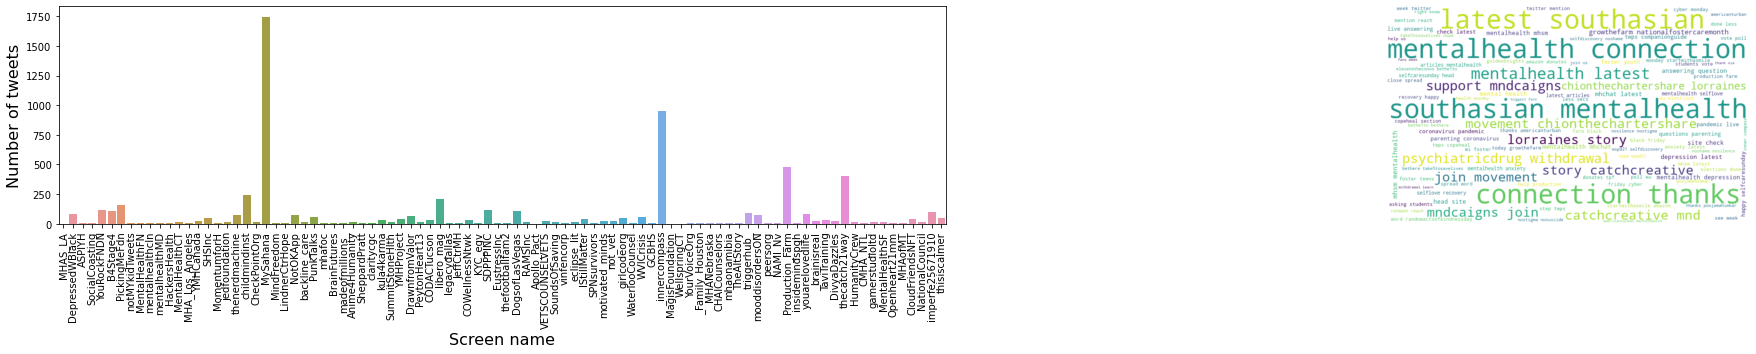

1

In [ ]:
stopwords = set(STOPWORDS)
cluster_label_column= 'kmeans_label_tfidf_umap'
kmeans_wordcloud_userhist(df,cluster_label_column,stopwords )

## Task 2: Find average sentiment among top five users.

Run a Sentiment Analysis on each of the 5 users with the most tweets (Lecture 6/Homework 3 Problems 1 and 2) [data: Tweets]

In [ ]:
fname_T5 = pd.read_csv("data/mental_health_top5.csv")
df = fname_T5[['screen_name','text']]
df['text_clean']=df.text.apply(ta.clean_tweet)
df=df[df.text_clean.str.len()>0]
nk=len(df)
print(f"There are {nk} tweets by the five accounts with the most number of followers, after cleaning them")
fname_T5.head()

There are 16108 tweets by the five accounts with the most number of followers, after cleaning them


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
0,41014,2022-04-14T18:43:00.000Z,childmindinst,"Like any tool, time outs need to be used correctly if you want them to be effective. https://t.co/VGmpR0Dn0Z",en,1,0,2,0,1.514680e+18,233609943,1.514680e+18,NaN,None
1,41015,2022-04-14T17:55:01.000Z,childmindinst,"Tools to help kids get organized, focused, and out the door on time. https://t.co/7nVoXdWrNG",en,2,0,3,0,1.514660e+18,233609943,1.514660e+18,NaN,None
2,41016,2022-04-14T15:56:39.000Z,childmindinst,RT @childmindinst: Nominations for our Rising Scientist Awards are now open. \n\nTeachers and educators please nominate your high school for…,en,2,0,0,0,1.514630e+18,233609943,1.514630e+18,NaN,None
3,41017,2022-04-14T15:36:58.000Z,childmindinst,"Nominations for our Rising Scientist Awards are now open. \n\nTeachers and educators please nominate your high school for high school students who show exceptional promise in psychology, neuroscience or biomedical engineering research.",en,2,0,0,1,1.514630e+18,233609943,1.514630e+18,NaN,None
4,41018,2022-04-14T01:37:24.000Z,childmindinst,"Depression symptoms, like feeling constantly sad or exhausted, can make parenting feel overwhelming. But experiencing depression does not mean you’re a bad parent. Depression is treatable, and with support, parents experiencing it can thrive.",en,8,3,13,0,1.514420e+18,233609943,1.514420e+18,NaN,None


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

def sentiment_classifier(text,model,tokenizer):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)

    token_type_ids = inputs['token_type_ids']
    input_ids = inputs['input_ids']

    output = model(input_ids, token_type_ids=token_type_ids,return_dict=True,output_hidden_states=True)
    logits = np.array(output.logits.tolist()[0])
    prob = np.exp(logits)/np.sum(np.exp(logits))
    sentiment = np.sum([(x+1)*prob[x] for x in range(len(prob))])  #use this line if you want the mean score
    embedding = output.hidden_states[12].detach().numpy().squeeze()[0]
    
    return sentiment,embedding

c = 0
Sentiment = []
Embedding = []
for index,row in df.iterrows():  #iterate over rows of dataframe
    c+=1
    if c%1000==0:print(f"Tweet {c}/{len(df)}")  #print progres every 1000 rows

    sentiment,embedding = sentiment_classifier(row.text,model,tokenizer)  #calculate sentiment and embedding of tweet
    Sentiment.append(sentiment)  #append sentiment of tweet to Sentiment list
    Embedding.append(embedding) #append embedding of tweet to Embedding list

df['sentiment'] = Sentiment  #add sentiment column to dataframe of tweets
df.head()
    

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Tweet 1000/16108
Tweet 2000/16108
Tweet 3000/16108
Tweet 4000/16108
Tweet 5000/16108
Tweet 6000/16108
Tweet 7000/16108


In [ ]:
print(f"The mean opinion of the tweets is {sentiment:.2f}")

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.histplot(data=df, x = "sentiment")
plt.title(f"Tweet sentiment of top 5 users",fontsize = 16)
plt.xlabel("Sentiment",fontsize = 16)
plt.ylabel("Tweet count",fontsize = 16)
plt.show()

In [ ]:
ndisplay = 5

print(f"Top {ndisplay} Most Positive Tweets of the top five users:")
df_display = df.sort_values(by = ['sentiment'], ascending = False)
c=0
for index,row in df_display.iterrows():
  c+=1
  text = codecs.decode(row.text, 'unicode_escape')
  print(f"\tsentiment = {row.sentiment:.2f}: {text}")
  if c>=ndisplay:break



In [ ]:
ndisplay = 5

print(f"Top {ndisplay} Most Negative Tweets of the top five users:")
df_display = df.sort_values(by = ['sentiment'], ascending = True)
c=0
for index,row in df_display.iterrows():
  c+=1
  text = codecs.decode(row.text, 'unicode_escape')
  print(f"\tsentiment = {row.sentiment:.2f}: {text}")
  if c>=ndisplay:break



In [ ]:
df['star'] = df.sentiment.round()

fig = plt.figure(figsize = (16,8))
ax = sns.barplot(data=df, x="star", y="screen_name")
plt.title(f"Sentiment top 5 users Tweets rounded",fontsize = 16)
plt.xlabel("Sentiment rounded", fontsize = 16)
plt.ylabel("Retweet Count", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.grid()
plt.show()

## 3. (9 points) Plot mean sentiment vs mean retweet count per cluster

Run a Single User Time Series Analysis on the five users based in North America that have the most tweets. (Homework 4 Problem 1) [data: Tweets]

In [ ]:
for n_clusters in n_clusters:
  df['mean_sentiment']=df.sentiment.mean()
  df['mean_rtcount']=df.retweet_count.mean()

  fig = plt.figure(figsize = (12,8))
  ax = sns.scatterplot(data=df, x="sentiment", y="retweet_count")
  plt.xlabel("Sentiment", fontsize = 16)
  plt.ylabel("Retweet Count", fontsize = 16)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)

  plt.grid()
  plt.show()

NameError: ignored

In [ ]:
kmeans_label = cluster.KMeans(n_clusters=n_clusters).fit_predict(np.nan_to_num(umap_tfidf_embedding))
df['kmeans_label_tfidf_umap'] = [str(x) for x in kmeans_label]
s=1000
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x= 'retweet_count', y = 'sentiment')
plt.xlim([3,4])
plt.xlabel("Screen name",fontsize = 16)
plt.ylabel("Mean sentiment",fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Sentiment vs Screen Name",fontsize = 20)
plt.grid()

NameError: ignored

## Task 4: Analyze communities of some follower networks to give Reflect an idea of follower relationships in their organizational focus.

Analyze Follower Networks with Centralities (Homework 5 Problem 1) [data: Follower Network]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
my_rho = np.corrcoef(mean_sentiment, mean_rt)
print()

## Task 5: Analyze communities of some follower networks to find follower prospects for Reflect. 

Community Detection (Lecture 12/Homework 6 Problem 1&2) [data: Follower Network]

**Imports**

In [ ]:
import networkx as nx
import networkx.algorithms.community as nx_comm
!pip3 install pickle5
import pickle5 as p
import pickle

In [ ]:
fname_following = "/content/Final_Project/sma_fproject_data_following.csv"

!pip3 install pickle5
path_to_protocol5 = "/content/Final_Project/sma_fproject_data_following.csv"


with open(path_to_protocol5, "rb") as fh:
  data = p.load(fh)

with open(path_to_protocol5, "wb") as f:
  #Pickle the 'labeled-data' dictionary using the highest protocol available.
  pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
  
G = nx.read_gpickle(fname_following)

In [ ]:
nv_max = 100  #max number of nodes to draw for
nv = G.number_of_nodes()
if nv<nv_max:
    pos = nx.kamada_kawai_layout(G.to_undirected())
    nx.draw(G,pos,node_size = 100, node_color = 'red', with_labels = True)
    
else: print(f"Network has {nv} nodes, which is more than {nv_max}")

## Task 6: Find top keywords for mental health organizations to use in tweets

(Lecture 15/Homework 8) [data: Tweets/Users]

In [ ]:
fname = "/content/social_media_analytics/finalproject/sma_fproject_data_tweets (1).csv"
df = pd.read_csv(fname)
df.head()

,Unnamed: 0,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
0,0,2022-04-14T21:19:51.000Z,MHAS_LA,"RT @LACBAveterans: #Veterans in #CA, there are still spots open for our April 20th Record Clearing Clinic! Do you have an old conviction th…",en,1,0,0,0,1514715080394375194,135385762,1514715080394375194,NaN,None
1,1,2022-04-14T21:17:56.000Z,MHAS_LA,"RT @FairHsngNorCal: FHANC’s Virtual Fair Housing Conference, ‘Investing in Our Future: Fair Housing and Race-Conscious Policies' is on Apri…",en,1,0,0,0,1514714594551365641,135385762,1514714594551365641,NaN,None
2,2,2022-04-13T15:23:22.000Z,MHAS_LA,We'll be there (virtually)! Join us at the #HousingRightsSummit on April 21.\n#FairHousingMonth #KnowYourRights https://t.co/nZaKFtEvSF,en,1,0,2,0,1514262978454904838,135385762,1514262978454904838,NaN,None
3,3,2022-04-13T14:40:34.000Z,MHAS_LA,"RT @DisabilityCA: Reporting mental health disability discrimination is one of the best ways to fight it!\n\nIn this webinar, you’ll learn how…",en,6,0,0,0,1514252207780085761,135385762,1514252207780085761,NaN,None
4,4,2022-04-11T18:58:23.000Z,MHAS_LA,April 14 at 1:00pm PT: DFEH webinar re: Emotional Support Animals and Fair Housing Law \n#FairHousingMonth https://t.co/JB42shbEa3,en,0,0,0,0,1513592314974785537,135385762,1513592314974785537,NaN,None


In [ ]:
df['text_clean'] = df.text.apply(ta.clean_tweet)  #clean the tweets
df = df[df.text_clean.str.len() >0]  #remove cleaned tweets of lenght 0

stopwords = set(STOPWORDS)  #set the stopwords
words_max = 10 #maximum number of words to plot in word frequency plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


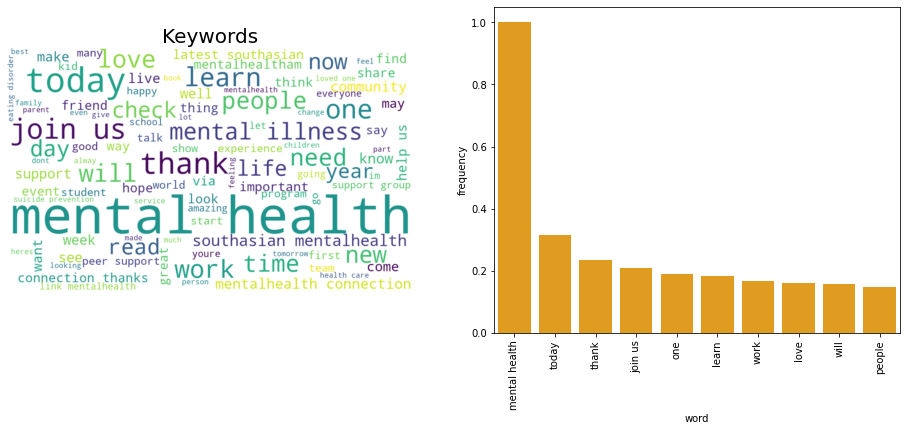

In [ ]:
  text=' '.join(df.text_clean.tolist()).lower()

  #generate word cloud
  wordcloud = WordCloud(stopwords=stopwords,max_font_size=150, max_words=100, background_color="white",width=1000, height=600)
  wordcloud.generate(text)

  #create dataframe of words and frequencies
  df_words = pd.DataFrame({'word':wordcloud.words_.keys(), 'frequency':wordcloud.words_.values()})
  df_words = df_words.sort_values(by = 'frequency', ascending = False)

  #plot word cloud and word frequencies
  plt.figure(figsize = (16,6))
  plt.subplot(1,2,1)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f"Keywords", fontsize = 20)
  plt.axis("off")

  plt.subplot(1,2,2)
  sns.barplot(data = df_words[0:words_max], x = 'word', y = 'frequency', color = 'orange')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
keywords = ['mental health','today','thank','join']
for keyword in keywords:
  X0 = df.retweet_count[df[f"keyword_{keyword}"]==False].dropna().tolist()
  X1 = df.retweet_count[df[f"keyword_{keyword}"]==True].dropna().tolist()
  n0 = len(X0)
  n1 = len(X1)

  mu0 = np.mean(X0)
  mu1 = np.mean(X1)

  print(f"Tweets")
  print(f"Contains {keyword}\tNumber of tweets\tMean retweet count")
  print(f"False\t\t{n0}\t\t\t{mu0:.3f}")
  print(f"True\t\t{n1}\t\t\t{mu1:.3f}")

Tweets
Contains mental health	Number of tweets	Mean retweet count
False		87			99.434
True		10			273.815
Tweets
Contains today	Number of tweets	Mean retweet count
False		91			123.465
True		6			25.599
Tweets
Contains thank	Number of tweets	Mean retweet count
False		91			114.711
True		6			158.361
Tweets
Contains join	Number of tweets	Mean retweet count
False		80			119.714
True		17			106.573


In [ ]:
for keyword in keywords:
  (tstat, pval) =stats.ttest_ind(X0,X1, equal_var = False)

  print('T-test')
  print(f"{keyword}: t-stat = {tstat:.3f} ({pval:.3f})\n")
  alpha = 0.01  #significance level
  if pval <=alpha:
    print("Significant at 1% level")
  else:
    print("Not significant at 1% level")

T-test
mental health: t-stat = 0.176 (0.862)

Not significant at 1% level
T-test
today: t-stat = 0.176 (0.862)

Not significant at 1% level
T-test
thank: t-stat = 0.176 (0.862)

Not significant at 1% level
T-test
join: t-stat = 0.176 (0.862)

Not significant at 1% level


In [ ]:
 for keyword in keywords: 
  ustat, pval = stats.mannwhitneyu(X0, X1)

  print('Mann Whitney U test')
  print(f"{keyword}: U-stat = {ustat:.3f} ({pval:.3f})\n")
  alpha = 0.01  #significance level
  if pval <=alpha:
    print("Significant at 1% level")
  else:
    print("Not significant at 1% level")

Mann Whitney U test
mental health: U-stat = 607.000 (0.246)

Not significant at 1% level
Mann Whitney U test
today: U-stat = 607.000 (0.246)

Not significant at 1% level
Mann Whitney U test
thank: U-stat = 607.000 (0.246)

Not significant at 1% level
Mann Whitney U test
join: U-stat = 607.000 (0.246)

Not significant at 1% level


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6389: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
